# 2 New Characters For The Titanic Reboot

In [80]:
import pandas as pd
import matplotlib.ticker as plt

df = pd.read_csv('titanic_passengers.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 69.7+ KB


**From our column info, we can see that our cabin column is missing alot of data in its rows. We'll ignore that since that variable has no correlation to our profiles. Let's start with finding out the survival rate for our males and females(sex). We will create a pie chart that shows the percentage of male and female survival rates.**

<Axes: title={'center': 'Survival Rate By Sex'}>

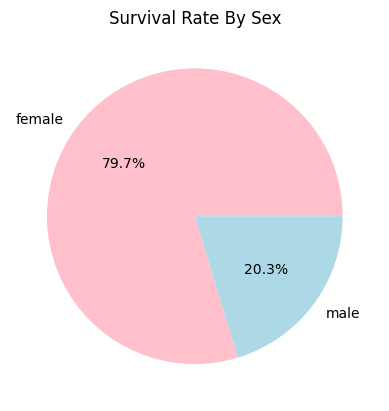

In [45]:
sex_survival_rates = df.groupby('Sex')['Survived'].mean()

sex_survival_rates.plot(kind='pie', title='Survival Rate By Sex', autopct='%1.1f%%', colors=['pink','lightblue'], ylabel='')

**Men had a 20.3% of surviving and woman had a 79.7% of surviving. This tells us that for our 'Most Likely To Survive' (MLTS for short) profile, we need the sex to be woman. And our 'Least likely To Survive' (LLTS) profile, we need the sex to be man. Now, let's go through the passenger class and see what the survival rate is for the 3 seperate classes. We will create a bar chart that showcases the survival rate of 1st, 2nd, and 3rd class.**

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


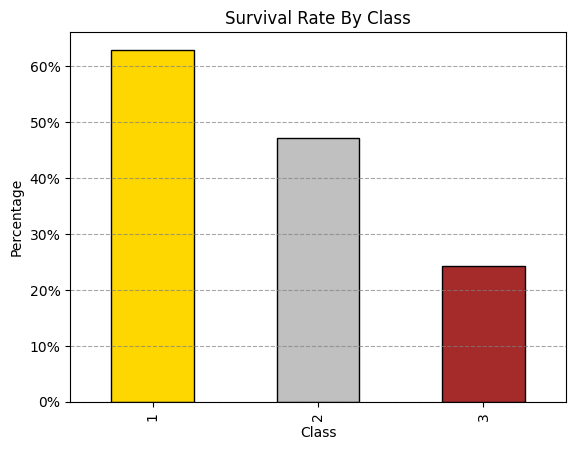

In [118]:
class_survival_rates = df.groupby('Pclass')['Survived'].mean() * 100

ax = class_survival_rates.plot(kind='bar', ylabel='Percentage', xlabel='Class', title='Survival Rate By Class', color=['gold', 'silver', 'brown'], edgecolor='black')
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.yaxis.set_major_formatter(plt.PercentFormatter())

print(class_survival_rates)

**From this bar chart we can gather from most to least survivability, the order is 1st,2nd,3rd. WHAT A SURPRISE!!!! For our MLTS, they will be riding 1st class with a 63% chance of survival. And our LLTS will be riding 3rd class with a 24.2% chance of survival. Now for the age column. There are a few rows that are missing age data in them so we will impute that data by adding the median to all the null variables. Then we will create a bar chart of the survival rate of age groups instead of specific ages.**

AgeGroup
Child (0-12)     57.971014
Teen (13-19)     41.052632
Adult (20-59)    36.519258
Senior (60+)     26.923077
Name: Survived, dtype: float64


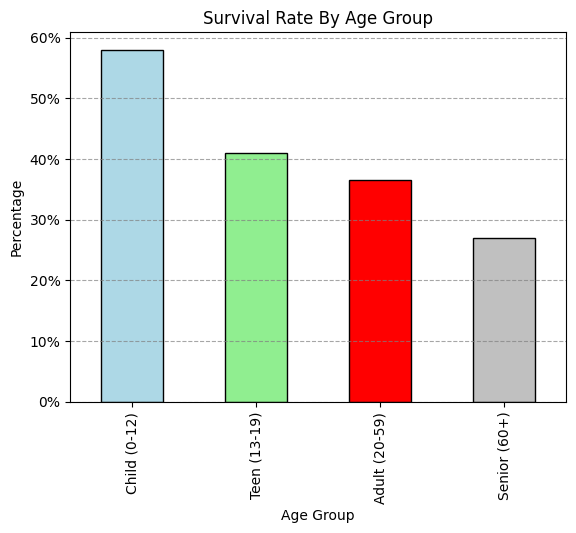

In [117]:
# Impute Missing Age Data
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Child Group
df.loc[((df['Age'] > 0) & (df['Age'] <= 12)), 'AgeGroup'] = 'Child (0-12)'
# Teen Group
df.loc[((df['Age'] >= 13) & (df['Age'] <= 19)), 'AgeGroup'] = 'Teen (13-19)'
# Adult Group
df.loc[((df['Age'] >= 20) & (df['Age'] <= 59)), 'AgeGroup'] = 'Adult (20-59)'
# Senior Group
df.loc[(df['Age'] >= 60), 'AgeGroup'] = 'Senior (60+)'

# Now let's find the survival rates for each age group
ageGroup_survival_rates = df.groupby('AgeGroup')['Survived'].mean() * 100
ageGroup_survival_rates = ageGroup_survival_rates.sort_values(ascending=False)

ax = ageGroup_survival_rates.plot(kind='bar', ylabel='Percentage', xlabel='Age Group', title='Survival Rate By Age Group', color=['lightblue', 'lightgreen', 'red', 'silver'], edgecolor='black')
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.yaxis.set_major_formatter(plt.PercentFormatter())

print(ageGroup_survival_rates)

**Nice, from this data we can see that as the ages go up, the survival rate goes down. There is clearly a relationship between the two. Our MLTS will be a child around the age of 0-12 and our LLTS will be a senior about 60+ years of age. Now we need to find the survival rate of passengers based on the amount of travel companions they had. Let's do what we did with the ages and create a new column called 'FamilySize'. This will be the 'SibSp' and 'Parch' columns added together. Then we will create a bar chart for the survival rate of passengers based on the amount of travel companions they were with.**

FamilySize
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


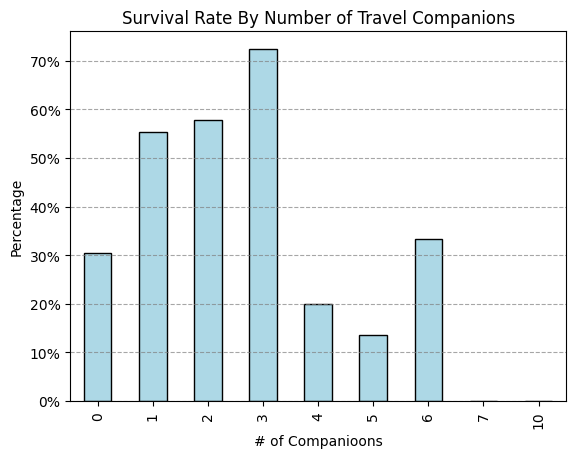

In [116]:
# Create column that adds column SibSp and Parch together
df['FamilySize'] = df['SibSp'] + df['Parch']

# Now let's find the survival rates for the number of travel companions
familySize_survival_rates = df.groupby('FamilySize')['Survived'].mean() * 100

ax = familySize_survival_rates.plot(kind='bar', ylabel='Percentage', xlabel='# of Companioons', title='Survival Rate By Number of Travel Companions', color='lightblue', edgecolor='black')
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.yaxis.set_major_formatter(plt.PercentFormatter())

print(familySize_survival_rates)

**This chart shows us that the survival rate goes up from 0-3, and then drops drastically from 4-6. 7 and 10 have a 0% chance of survival. Our MLTS will have 3 travel companions with them at a 72% chance of survival. Our LLTS will have 10 travel companions with them at a 0% chance of survival. Poor guy, can't catch a break. Finally, let's find the survival rate based on the port the passenger embarked from. We will create a bar chart to visualize our data.**

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


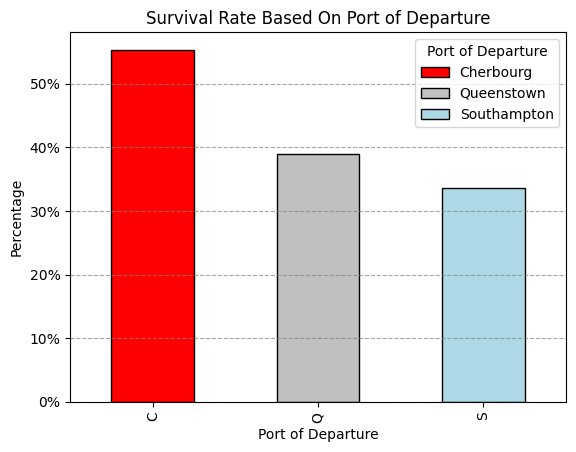

In [155]:
# Now let's find the survival rates for the port of departure
portOfDeparture_survival_rates = df.groupby('Embarked')['Survived'].mean() * 100

ax = portOfDeparture_survival_rates.plot(kind='bar', ylabel='Percentage', xlabel='Port of Departure', title='Survival Rate Based On Port of Departure', color=['red', 'silver', 'lightblue'], edgecolor='black')
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.yaxis.set_major_formatter(plt.PercentFormatter())
bars = ax.patches
ax.legend(bars, ['Cherbourg', 'Queenstown', 'Southampton'], title='Port of Departure')

print(portOfDeparture_survival_rates)

**The survival rate from our 3 ports are in. Cherbourg is our highest with a 55.4% chance of survival, Queenstown is our next highest with a 39% chance of survival, and Southampton is our lowest with a 33.7% chance of survival. That means our MLTS will be departing from Cherbourg and our LLTS will be departing from Southampton. Now let's search through our database and find real passengers who fit our 2 profiles.**

## Profile 1 (Most Likely To Survive):
**Sex:** Female
**Class:** 1st
**Age:** Child (0-12 years)
**Travel Companions:** 1,2, or 3
**Port of Departure:** Cherbourg

## Profile 2 (Least Likely To Survive):
**Sex:** Male
**Class:** 3rd
**Age:** Senior (60+ years)
**Travel Companions:** 0 or (4 or more)
**Port of Departure:** Southampton

In [188]:
MLTS = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['AgeGroup'] == 'Child (0-12)') & (df['FamilySize'] <= 3) & (df['FamilySize'] > 0) & (df['Embarked'] == 'C')]
LLTS = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['AgeGroup'] == 'Senior (60+)') & ((df['FamilySize'] == 0) | (df['FamilySize'] >= 4)) & (df['Embarked'] == 'S')]

print(MLTS)
print('\n\n')
print(LLTS)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, AgeGroup, FamilySize]
Index: []



     PassengerId  Survived  Pclass                       Name   Sex   Age  \
326          327         0       3  Nysveen, Mr. Johan Hansen  male  61.0   
851          852         0       3        Svensson, Mr. Johan  male  74.0   

     SibSp  Parch  Ticket    Fare Cabin Embarked      AgeGroup  FamilySize  
326      0      0  345364  6.2375   NaN        S  Senior (60+)           0  
851      0      0  347060  7.7750   NaN        S  Senior (60+)           0  


**No one seems to match our MLTS parameters, so we will just find a close match. Let's first switch the passenger class to '2nd' since it's the next safest option.**

In [193]:
MLTS = df.loc[(df['Survived'] == 1) & (df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['AgeGroup'] == 'Child (0-12)') & (df['FamilySize'] <= 3) & (df['FamilySize'] > 0) & (df['Embarked'] == 'C')]
print(MLTS)

    PassengerId  Survived  Pclass                                      Name  \
43           44         1       2  Laroche, Miss. Simonne Marie Anne Andree   

       Sex  Age  SibSp  Parch         Ticket     Fare Cabin Embarked  \
43  female  3.0      1      2  SC/Paris 2123  41.5792   NaN        C   

        AgeGroup  FamilySize  
43  Child (0-12)           3  


**There we go! Now that we got our 2 profiles matched with real passengers, let's get to know them.**

## Miss. Simonne Marie Anne Andree (Most Likely To Survive):
**Sex:** Female
**Class:** 2nd
**Age:** 3
**Travel Companions:** 3
**Port of Departure:** Cherbourg

## Mr. Johan Svensson (Least Likely To Survive):
**Sex:** Male
**Class:** 3rd
**Age:** 74
**Travel Companions:** 0
**Port of Departure:** Southampton

## Fact
**Miss. Simonne was born in Paris, France and lived to be 64 years old before dying single.**

**Mr. Johan was a farmer who, after his wife died, decided to move to America after being persuaded by his children, who immigrated there. He was the oldest person aboard the ship.**